<a href="https://colab.research.google.com/github/sajidsami/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/hotel analysis/Hotel Booking Analysis/Hotel Bookings.csv'
df=pd.read_csv(path)

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#drop the column
df=df.drop(['company','agent'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# We delete rows with empty cells
df=df.dropna(axis=0)

In [ ]:
#check missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#merge ‘children’ and ‘babies’ columns into ‘kids’ column.
df['kids']= df.children + df.babies

In [ ]:
# create a column for 'Total_member'
df['Total_member']= df.kids + df.adults 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [ ]:
#convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [ ]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = df['arrival_date'].apply(pd.to_datetime)
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)

In [ ]:
cancelled_data = df[df['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  object        
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  object        
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  object        
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

**Basic Data Analysis on Bookings**

In [ ]:
#confirmed booking per month
print('no of booking in month')
month_booking=df.arrival_date_month.value_counts()
print(month_booking)

no of booking in month
August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64


Text(0.5, 0, 'Month')

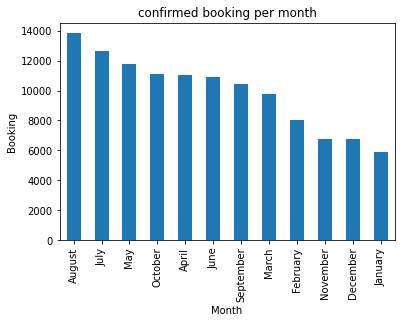

In [ ]:
month_booking.plot(kind='bar')
plt.title('confirmed booking per month')
plt.ylabel('Booking')
plt.xlabel('Month')

In [ ]:
# customer most prefferd hotel
hotel_preferred=df.hotel.value_counts()
hotel_preferred

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

Text(0.5, 0, 'Type of hotel')

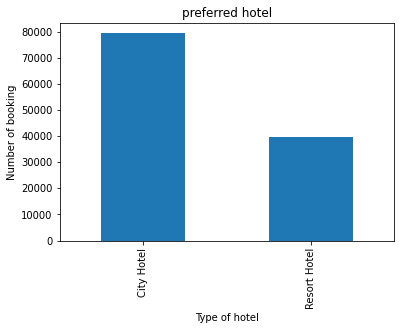

In [ ]:
hotel_preferred.plot(kind='bar')
plt.title('preferred hotel')
plt.ylabel('Number of booking')
plt.xlabel('Type of hotel')

In [ ]:
#which channel this most preferred for booking
booking_channel = df. distribution_channel.value_counts()
booking_channel

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

Text(0.5, 0, 'Channel')

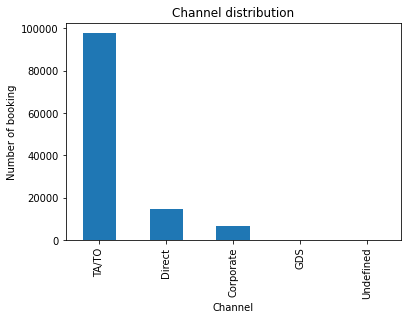

In [ ]:
booking_channel.plot(kind='bar')
plt.title('Channel distribution')
plt.ylabel('Number of booking')
plt.xlabel('Channel')

In [ ]:
#Top ten country booking 
country_booking = df.country.value_counts().head(10)
country_booking

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 0, 'Country')

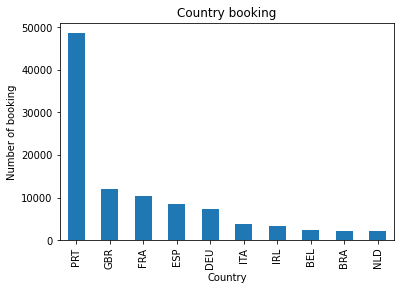

In [ ]:
country_booking.plot(kind='bar')
plt.title('Country booking')
plt.ylabel('Number of booking')
plt.xlabel('Country')


In [ ]:
#hotel is canceled the booking
cancel = df[df['is_canceled']=='0']
cancel_booking=cancel.groupby(['hotel','is_canceled'])['is_canceled'].count()
cancel_booking

hotel         is_canceled
City Hotel    0              46226
Resort Hotel  0              28519
Name: is_canceled, dtype: int64

Text(0.5, 0, 'Hotel')

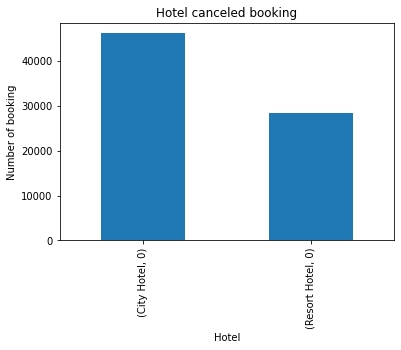

In [ ]:
cancel_booking.plot(kind='bar')
plt.title('Hotel canceled booking')
plt.ylabel('Number of booking')
plt.xlabel('Hotel')

In [ ]:
# Monthly booking of different hotel
month_booking=df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_booking

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,7476,3569
August,8979,4873
December,4129,2599
February,4965,3047
January,3736,2138
July,8088,4540
June,7894,3033
March,6458,3281
May,8232,3547


Text(0.5, 0, 'month')

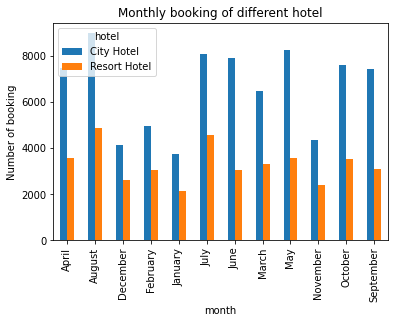

In [ ]:
month_booking.plot(kind='bar')
plt.title('Monthly booking of different hotel')
plt.ylabel('Number of booking')
plt.xlabel('month')

**Customer behavior analysis**

In [ ]:
# Yearly booking of different hotel
yearly_hotel_booking=df.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
yearly_hotel_booking

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13663,8196
2016,38135,18300
2017,27504,13100


Text(0, 0.5, 'Number of booking')

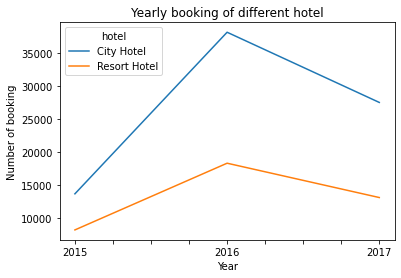

In [ ]:
yearly_hotel_booking.plot()
plt.title('Yearly booking of different hotel')
plt.xlabel('Year')
plt.ylabel('Number of booking')

In [ ]:
# different country and their booking different type hotel
country_hotel=df.groupby(['country'])['hotel'].value_counts()
top_10_country = country_hotel.nlargest(10)
top_10_country

country  hotel       
PRT      City Hotel      30956
         Resort Hotel    17630
FRA      City Hotel       8804
GBR      Resort Hotel     6814
DEU      City Hotel       6084
GBR      City Hotel       5315
ESP      City Hotel       4611
         Resort Hotel     3957
ITA      City Hotel       3307
IRL      Resort Hotel     2166
Name: hotel, dtype: int64

In [ ]:
p=top_10_country.unstack()
hotel_country=p.fillna(0)
hotel_country

hotel,City Hotel,Resort Hotel
country,,
PRT,30956.0,17630.0
FRA,8804.0,0.0
GBR,5315.0,6814.0
DEU,6084.0,0.0
ESP,4611.0,3957.0
ITA,3307.0,0.0
IRL,0.0,2166.0


Text(0.5, 0, 'Country')

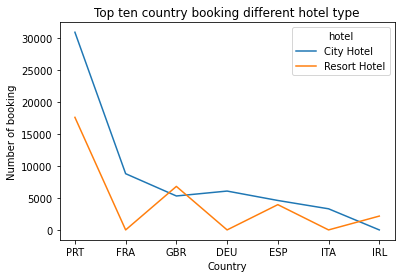

In [ ]:
hotel_country.plot()
plt.title('Top ten country booking different hotel type')
plt.ylabel('Number of booking')
plt.xlabel('Country')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  object        
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  object        
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  object        
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

What are the percentage of cancellations in hotels? Which Hotel has the highest
percentage of cancellations?

In [ ]:

abc=df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
abc

is_canceled,0,1
hotel,,
City Hotel,46226,33076
Resort Hotel,28519,11077


Text(0, 0.5, 'count')

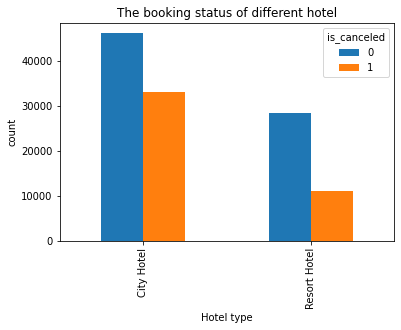

In [ ]:
abc.plot(kind='bar')
plt.title('The booking status of different hotel')
plt.xlabel('Hotel type')
plt.ylabel('count')

In [ ]:
hotel_percentage=df.hotel.value_counts(normalize=True)
hotel_percentage

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

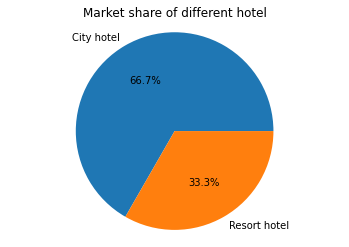

In [ ]:
my_labels= 'City hotel','Resort hotel'
plt.pie(hotel_percentage,labels=my_labels,autopct='%1.1f%%')
plt.title('Market share of different hotel')
plt.axis('equal')
plt.show()

In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel

In [ ]:
resort_booking=resort_hotel.is_canceled.value_counts(normalize=True)
resort_booking

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel.is_canceled.value_counts()

0    28519
1    11077
Name: is_canceled, dtype: int64

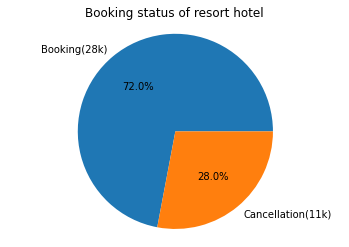

In [ ]:
my_labels= 'Booking(28k)','Cancellation(11k)'
plt.pie(resort_booking,labels=my_labels,autopct='%1.1f%%')
plt.title('Booking status of resort hotel')
plt.axis('equal')
plt.show()

In [ ]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Total_member,arrival_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03,0.0,1.0,2015-07-01
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01,0.0,2.0,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30,0.0,1.0,2015-07-01
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23,0.0,2.0,2015-07-01
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02,0.0,2.0,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0,2.0,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0,3.0,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0,2.0,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0,2.0,2017-08-31


In [ ]:
city_hotel_booking= city_hotel.is_canceled.value_counts(normalize=True)
city_hotel_booking


0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [ ]:
city_hotel.is_canceled.value_counts()

0    46226
1    33076
Name: is_canceled, dtype: int64

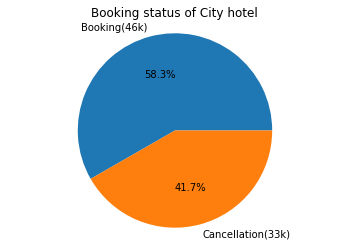

In [ ]:
my_labels= 'Booking(46k)','Cancellation(33k)'
plt.pie(city_hotel_booking,labels=my_labels,autopct='%1.1f%%')
plt.title('Booking status of City hotel')
plt.axis('equal')
plt.show()

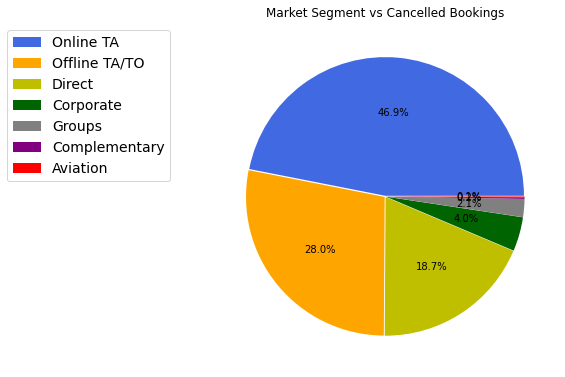

In [ ]:
# Different market segment with cancelled booking percent 

plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()